### Install YOLOv11 Library  
This command installs the `ultralytics` package, which provides the latest YOLO models, including YOLOv11, for object detection and image analysis.


In [ ]:
!nvidia-smi

Thu Mar 27 17:17:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install llama-index-core
%pip install llama-index-readers-file
%pip install llama-index-tools-wolfram-alpha
%pip install crewai[tools]
%pip install llama-index-embeddings-huggingface --no-deps
%pip install llama-index-llms-groq
%pip install langchain_groq
%pip install ultralytics


  Using cached tokenizers-0.20.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached tokenizers-0.20.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.50.0 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.20.3 which is incompatible.
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Succe

In [ ]:
import os
from PIL import Image
from google.colab import drive
from ultralytics import YOLO
from llama_index.llms.groq import Groq
from langchain_openai import ChatOpenAI
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.llms.openai import OpenAI
from langchain_openai import ChatOpenAI
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from crewai_tools import LlamaIndexTool
from crewai_tools import ScrapeWebsiteTool
from crewai import LLM
from crewai import Agent, Task, Crew, Process

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Load a pretrained model
# model = YOLO("/content/drive/MyDrive/runs/detect/train2/weights/last.pt")

# # Train the model
# results = model.train(data='/content/drive/MyDrive/data.yaml', epochs=40)

In [ ]:
# Load your custom-trained model
model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')  # Update path to your model

In [ ]:
results = model.predict(source="/content/drive/MyDrive/test/images/KAJAL-_01_opg_jpg.rf.360fb5af1d24d1ad06ee8d12ef22db1e.jpg", save=True)



image 1/1 /content/drive/MyDrive/test/images/KAJAL-_01_opg_jpg.rf.360fb5af1d24d1ad06ee8d12ef22db1e.jpg: 640x640 1 Root Canal, 1 caries, 2 root stumps, 79.6ms
Speed: 3.5ms preprocess, 79.6ms inference, 17.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
# Initialize an empty list to store predicted classes
predicted_classes = []

# Iterate through detected objects and store classes with confidence > 60%
for *xyxy, conf, cls in results[0].boxes.data:
    if conf.item() > 0.7:  # Check if confidence is greater than 0.6 (60%)
        class_name = model.names[int(cls)]
        predicted_classes.append(class_name)

# Print the list of predicted classes with high confidence
print("Predicted classes with confidence > 30%:", predicted_classes)

Predicted classes with confidence > 30%: ['root stump', 'root stump']


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Assuming uploaded_image_np is the original image and model.predict returns an image with predictions drawn
results = model.predict(uploaded_image_np, save=True, imgsz=320, conf=0.5)

# The result image is saved after the prediction, you can load it from the path
predicted_image_path = results.files[0]  # Assuming it's saved as the first image
predicted_image = cv2.imread(predicted_image_path)  # Read the predicted image

# Convert BGR to RGB (OpenCV uses BGR by default)
predicted_image_rgb = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

# Display the predicted image
plt.imshow(predicted_image_rgb)
plt.axis('off')  # Hide axes
plt.show()


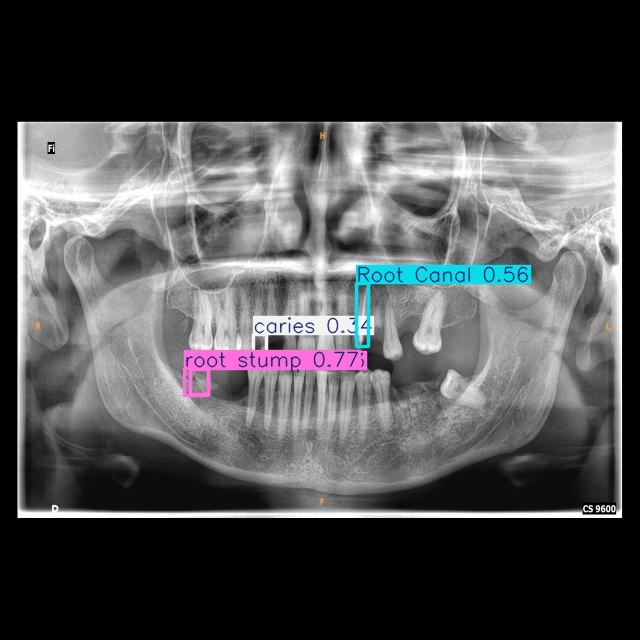

In [ ]:
from PIL import Image

image_path = "/content/runs/detect/predict/KAJAL-_01_opg_jpg.rf.360fb5af1d24d1ad06ee8d12ef22db1e.jpg"
img = Image.open(image_path)
img

In [ ]:
result = predicted_classes[0]

In [ ]:
result

'root stump'

In [ ]:
os.environ['OPENAI_API_KEY'] = "sk-QjjMoRwKPjHXTEzvcum3eA"

In [ ]:


llm_agent = LLM(
    model="gpt-3.5-turbo",
    temperature=0.7,
    base_url="https://api.nexus.navigatelabsai.com",
    api_key="sk-QjjMoRwKPjHXTEzvcum3eA"
)

In [ ]:
# !wget "https://s23.q4cdn.com/407969754/files/doc_financials/2019/ar/Uber-Technologies-Inc-2019-Annual-Report.pdf" -O uber_10k.pdf

# To read data from input files
reader = SimpleDirectoryReader(input_files=["/content/drive/MyDrive/runs/Feedback dental .pdf"])
docs = reader.load_data()


In [ ]:
#HuggingFaceEmbedding with the specified model
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#VectorStoreIndex with documents and embedding model
index = VectorStoreIndex.from_documents(docs,embed_model=embed_model,)

/usr/local/lib/python3.11/dist-packages/llama_index/core/indices/base.py:110: DeprecationWarning: Call to deprecated method get_doc_id. ('get_doc_id' is deprecated, access the 'id_' property instead.) -- Deprecated since version 0.12.2.
  docstore.set_document_hash(doc.get_doc_id(), doc.hash)


In [ ]:
groq_api_key="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"
llm = Groq(model="llama3-8b-8192", api_key=groq_api_key)

#This sets up the query engine to retrieve the top 5 most similar documents using the specified large language model (LLM).
query_engine = index.as_query_engine(similarity_top_k=5, llm=llm)

In [ ]:
query_tool = LlamaIndexTool.from_query_engine(
    query_engine,
    name="dental problems treament",
    description="Use this tool to lookup the dental problem treament plan",
)


In [ ]:


# To enable scrapping any website it finds during it's execution
scrape_tool = ScrapeWebsiteTool()


In [ ]:

dental_expert = Agent(
                    role="Dental Expert",
                    goal="Provide comprehensive dental treatment plans and advice",
                    backstory="""You are a highly experienced dentist with expertise in
                    various dental conditions and treatments. Your role is to analyze
                    dental scans and provide detailed treatment plans.""",
                    tools=[query_tool, scrape_tool],
                    llm=llm_agent,
                    verbose=True,
                )
treatment_task = Task(
                    description="""Based on the detected dental conditions:
                    {topic}, provide:
                    1. A detailed treatment plan
                    2. Post-procedure care instructions
                    3. Patient advice
                    Make it professional but easy to understand.""",
                    expected_output="Detailed treatment plan with post-procedure care and patient advice",
                    agent=dental_expert
                )

In [ ]:
# Create crew and execute
from crewai import Crew
crew = Crew(
agents=[dental_expert],
tasks=[treatment_task],
verbose=0,  # Enable verbose output
process=Process.sequential  # Run tasks sequentially
)

In [ ]:
from crewai import Crew
crew = Crew(
    agents=[researcher, writer],
    tasks=[task1, task2],
    verbose=0,  # You can set it to 0 to 2 to different logging levels
)

NameError: name 'researcher' is not defined

In [ ]:
result = crew.kickoff(inputs={"topic": "root canel"})
print("**********************************************************************")
print(result)

# Agent: Dental Expert
## Task: Based on the detected dental conditions: 
                    root canel, provide:
                    1. A detailed treatment plan
                    2. Post-procedure care instructions
                    3. Patient advice
                    Make it professional but easy to understand.


# Agent: Dental Expert
## Thought: I should first look up the detailed treatment plan for root canal treatment using the "dental problems treatment" tool. This will provide me with the necessary information to create a comprehensive response including post-procedure care instructions and patient advice.
## Using tool: dental problems treatment
## Tool Input: 
"{\"query\": \"root canal treatment\"}"
## Tool Output: 
A root canal treatment is a dental procedure used to treat the infection or inflammation at the center of a tooth, known as the pulp. The infection is usually the result of deep decay, trauma, repeated dental procedures, or cracks in the tooth. The pulp is

In [ ]:
sections = result.raw.split('\n\n')


In [ ]:
sections

['**Detailed Treatment Plan:** Root canal treatment is a procedure used to repair and save a tooth that is infected or badly decayed. During the procedure, the nerve and pulp of the tooth are removed, and the inside is cleaned and sealed to prevent further infection.',
 '**Post-Procedure Care Instructions:** After a root canal, it is important to avoid chewing with the treated tooth until it is fully restored. Over-the-counter pain medications can help manage any sensitivity or discomfort. Regular brushing, flossing, and the use of an antiseptic mouthwash are recommended. Follow-up appointments with the dentist should be scheduled as advised.',
 '**Patient Advice:** It is essential to address any signs that may indicate the need for a root canal, such as lingering tooth sensitivity, pain when chewing, or swollen gums. Seeking prompt treatment can help save the tooth and prevent further complications. Maintaining good oral hygiene practices can also help prevent the need for future root

In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import os
from PIL import Image
import numpy as np
from ultralytics import YOLO
from llama_index.llms.groq import Groq
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from crewai_tools import LlamaIndexTool, ScrapeWebsiteTool
from crewai import Agent, Task, Crew, Process, LLM

# Page configuration
st.set_page_config(
    page_title="DentalAI Diagnosis",
    page_icon="🦷",
    layout="wide"
)

# Initialize session state
if 'model' not in st.session_state:
    st.session_state.model = None
if 'groq_llm' not in st.session_state:
    st.session_state.groq_llm = None
if 'agent_llm' not in st.session_state:
    st.session_state.agent_llm = None

# App title and description
st.title("🦷 DentalAI Diagnosis")
st.markdown("### Advanced Dental Problem Detection & Treatment Planning")

# Sidebar for configuration
with st.sidebar:
    st.header("Configuration")
    model_path = st.text_input("YOLO Model Path", value="/content/drive/MyDrive/runs/detect/train/weights/best.pt")
    groq_api_key = st.text_input("Groq API Key", type="password", value="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")
    navigatelabs_api_key = st.text_input("NavigateLabs API Key", type="password", value="sk-QjjMoRwKPjHXTEzvcum3eA")

    if st.button("Initialize Models"):
        with st.spinner("Loading YOLO model..."):
            try:
                st.session_state.model = YOLO(model_path)
                st.success("YOLO model loaded successfully!")
            except Exception as e:
                st.error(f"Error loading YOLO model: {str(e)}")

        with st.spinner("Initializing LLMs..."):
            try:
                # Initialize Groq LLM for RAG
                st.session_state.groq_llm = Groq(
                    model="llama3-8b-8192",
                    api_key=groq_api_key
                )

                # Initialize Agent LLM
                st.session_state.agent_llm = LLM(
                    model="gpt-3.5-turbo",
                    temperature=0.7,
                    base_url="https://api.nexus.navigatelabsai.com",
                    api_key=navigatelabs_api_key
                )
                st.success("LLMs initialized successfully!")
            except Exception as e:
                st.error(f"Error initializing LLMs: {str(e)}")

# Main content area
col1, col2 = st.columns([1, 1])

with col1:
    st.subheader("Upload Dental Scan")
    uploaded_file = st.file_uploader("Choose a dental scan image", type=['png', 'jpg', 'jpeg'])

    if uploaded_file:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Scan", use_container_width=True)

        if st.button("Analyze Scan"):
            if st.session_state.model is None:
                st.error("Please initialize the YOLO model first!")
            else:
                with st.spinner("Analyzing dental scan..."):
                    # Convert PIL Image to numpy array
                    image_np = np.array(image)

                    # Run YOLO prediction
                    results = st.session_state.model.predict(image_np, conf=0.7)

                    # Get predicted classes
                    # predicted_classes = []
                    # for r in results:
                    #     for c in r.boxes.cls:
                    #         class_name = st.session_state.model.names[int(c)]
                    #         predicted_classes.append(class_name)
                    predicted_classes = set()  # Using a set to automatically remove duplicates
                    for r in results:
                        for c in r.boxes.cls:
                            class_name = st.session_state.model.names[int(c)]
                            predicted_classes.add(class_name)

                    # Convert set back to list for session state
                    predicted_classes = list(predicted_classes)

                    # Store results in session state
                    st.session_state.predicted_classes = predicted_classes

                    # Display annotated image
                    for r in results:
                        im_array = r.plot()
                        st.image(im_array, caption="Detection Results", use_container_width=True)

with col2:
    st.subheader("Analysis Results")

    if 'predicted_classes' in st.session_state and st.session_state.predicted_classes:
        with st.container():
            st.markdown("#### Detected Issues")
            for cls in st.session_state.predicted_classes:
                st.markdown(f"- {cls}")

            if st.session_state.agent_llm:
                # Create dental expert agent
                scrape_tool = ScrapeWebsiteTool()

                # Default document file path
                default_file = "/content/drive/MyDrive/runs/Feedback dental .pdf"

                # Allow multiple file uploads for RAG setup
                uploaded_docs = st.file_uploader(
                    "Upload medical documents for reference",
                    type=['pdf', 'txt'],
                    accept_multiple_files=True
                )

                # Use uploaded documents or default if none uploaded
                if uploaded_docs:
                    doc_paths = []
                    with st.spinner("Processing documents..."):
                        # Create temporary directory for documents
                        if not os.path.exists("temp_docs"):
                            os.makedirs("temp_docs")

                        # Save uploaded files
                        for doc in uploaded_docs:
                            doc_path = os.path.join("temp_docs", doc.name)
                            with open(doc_path, "wb") as f:
                                f.write(doc.getbuffer())
                            doc_paths.append(doc_path)

                        # Initialize embedding model
                        embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

                        # Create vector store index
                        reader = SimpleDirectoryReader(input_files=doc_paths)
                        docs = reader.load_data()
                        index = VectorStoreIndex.from_documents(docs, embed_model=embed_model)

                        # Cleanup uploaded files
                        for doc_path in doc_paths:
                            os.remove(doc_path)
                        os.rmdir("temp_docs")
                else:
                    # Use default file if no file uploaded
                    reader = SimpleDirectoryReader(input_files=[default_file])
                    docs = reader.load_data()

                    # Initialize embedding model
                    embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

                    # Create vector store index
                    index = VectorStoreIndex.from_documents(docs, embed_model=embed_model)

                # Initialize query engine using Groq LLM
                query_engine = index.as_query_engine(similarity_top_k=5, llm=st.session_state.groq_llm)

                query_tool = LlamaIndexTool.from_query_engine(
                    query_engine,
                    name="dental problems treatment",
                    description="Use this tool to lookup the dental problem treatment plan",
                )

                # Create the dental expert agent
                dental_expert = Agent(
                    role="Dental Expert",
                    goal="Provide comprehensive dental treatment plans and advice",
                    backstory="""You are a highly experienced dentist with expertise in
                    various dental conditions and treatments. Your role is to analyze
                    dental scans and provide detailed treatment plans.""",
                    tools=[query_tool, scrape_tool],
                    llm=st.session_state.agent_llm,
                    verbose=True,
                )

                treatment_task = Task(
                    description=f"""Based on the detected dental conditions:
                    {', '.join(st.session_state.predicted_classes)}, provide:
                    1. A detailed treatment plan
                    2. Post-procedure care instructions
                    3. Patient advice
                    Make it professional but easy to understand.""",
                    expected_output="Detailed treatment plan with post-procedure care and patient advice",
                    agent=dental_expert
                )

                # Create crew and execute the task
                crew = Crew(
                    agents=[dental_expert],
                    tasks=[treatment_task],
                    verbose=0,  # Enable verbose output
                    process=Process.sequential  # Run tasks sequentially
                )

                with st.spinner("Generating treatment plan..."):
                    result = crew.kickoff(inputs={"topic": ', '.join(st.session_state.predicted_classes)})
                     # Extract and display only the raw treatment plan text
                    # Split the result.raw text into sections
                    if result:
                      sections = result.raw.split('\n\n')

                      # Streamlit UI for displaying
                      st.title('Root Canal Treatment Information')
                      st.write(sections)

                      # Display each section with Streamlit
                    #   for section in sections:
                    #       st.subheader(section.split(':')[0])  # Display the section title (before the colon)
                    #       st.write(section.split(':')[1].strip())  # Display the content after the colon

                    else:
                        st.info("The result does not contain the expected raw content.")

            else:
                st.warning("Please initialize LLMs to generate treatment plans!")
    else:
        st.info("no dental issues detected")


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
!npm install upgrade localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏
up to date, audited 24 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠏

In [ ]:
!streamlit run agent.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.147.12.210
⠙your url is: https://big-jokes-hide.loca.lt
